In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import optimize
from PIL import Image
from scipy import optimize
from scipy.io import loadmat




In [2]:
data = loadmat('ex5data1.mat')
X=data['X']
y=data['y']

Xval=data['Xval']
yval=data['yval']

Xtest=data['Xtest']
ytest=data['ytest']

Text(0,0.5,'water flowing out of the dam y')

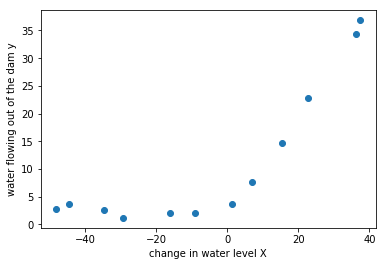

In [3]:
# 1.1 visualize data
plt.scatter(X, y)
plt.xlabel('change in water level X')
plt.ylabel('water flowing out of the dam y')

In [5]:
# 1.2 regularized linear regression cost
# 1.3 regularized linear regression gradient

def cost(X, y, thetas, lmbd):
    m=len(y)
    y_hat = np.hstack((np.ones((X.shape[0],1)), X)).dot(thetas.T).reshape((m,1))
    return np.sum((y_hat-y)**2)/(2*m)+lmbd/(2*m)*np.sum(thetas[1:]**2)
    
def grad(X, y, thetas, lmbd):
    m=len(y)
    X_aug=np.hstack((np.ones((X.shape[0],1)), X))
    y_hat = X_aug.dot(thetas.T).reshape((m,1))
#     print(y_hat)
    grad_thetas=[] #[np.sum((y_hat-y))/m]
    for i in range(X_aug.shape[1]):
#         print(i, thetas)
#         print('y diff', y_hat-y)
#         print('x[i]', X_aug[:, i].shape)
#         print(np.sum(np.squeeze((y_hat-y))*X_aug[:,i])/m)
#         print(lmbd*np.squeeze(thetas)[i+1]/m)
        if i==0: grad_thetas.append(np.sum(np.squeeze((y_hat-y))*X_aug[:,i])/m) 
        else: grad_thetas.append(np.sum(np.squeeze((y_hat-y))*X_aug[:,i])/m+lmbd*thetas[i]/m)
    return np.array(grad_thetas)
#     return np.array([np.sum((y_hat-y))/m, (y_hat-y).T.dot(X)/m + lmbd * thetas[0][1:]/m])

# test cost function: expect cost = 303.993, gradient = [-15.30, 598.250]
# print('X', X)
print('cost', cost(X, y, np.ones((X.shape[1]+1)), 1))
print('grad', grad(X, y, np.ones((X.shape[1]+1)), 1))

# print('xpoly', X_poly)
# print('cost', cost(X_poly, y, np.ones((X_poly.shape[1]+1)), 1))
# print('grad', grad(X_poly, y, np.ones((X_poly.shape[1]+1)), 1))

cost 303.9931922202643
grad [-15.30301567 598.25074417]


In [6]:
# 1.4 fitting linear regression
def fit_OLS(cost_fn, grad_fn, X, y, lmbd):
    n_X=X.shape[1]
#     init_thetas=np.array([1,1]) 
    init_thetas=np.zeros((n_X+1))
    def F(param): return cost_fn(X, y, param, lmbd)
    def Fprime(param): return grad_fn(X, y, param, lmbd)
    opts = {'maxiter' : 200,    # default value.
            #'maxiter' : None,    # default value.    
            'disp' : True,    # non-default value.
            'gtol' : 1e-5,    # default value.
            'norm' : np.inf,  # default value.
            'eps' : 1.4901161193847656e-08}  # default value.
    res1 = optimize.minimize(F, x0=init_thetas, jac=Fprime, method='CG', options=opts)
#     res1 = optimize.fmin_cg(f=F, x0=init_thetas, fprime=Fprime)
    return res1.x

In [7]:
res = fit_OLS(cost, grad, X, y, 0.)
res

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


array([13.08790351,  0.36777923])

In [8]:
def predict(X_test, solved_thetas):
    X_test=np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    return X_test.dot(solved_thetas)

Text(0,0.5,'water flowing out of the dam y')

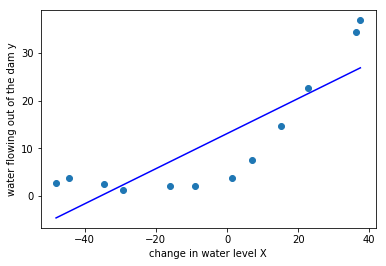

In [9]:
xs=np.linspace(min(X), max(X))
y_hat = predict(xs, res)
plt.scatter(X, y)
plt.plot(xs, y_hat, '-b')
plt.xlabel('change in water level X')
plt.ylabel('water flowing out of the dam y')

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

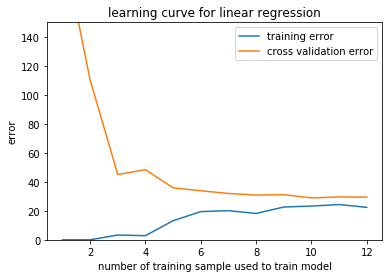

In [10]:
# 2 Bias - variance
# 2.1 Learning curves

def plot_learning_curve(X, y, Xval, yval, plot_title, lmbd=0, ylim=150):
    n_train=X.shape[0]
    n_cv=Xval.shape[0]
    # n_test=Xtest.shape[0]

    num_training_samples=np.arange(1, min(n_train, n_cv)+1)
    er_train, er_val = [], []

    # loop through number of samples
    for i in num_training_samples:
        theta_train = fit_OLS(cost, grad, X[:i], y[:i], lmbd); # not-regularized
        er_train.append(cost(X[:i], y[:i], theta_train, 0)) # training error does not include regularization by definition
        er_val.append(cost(Xval, yval, theta_train, 0)) # training error does not include regularization by definition
        # !!!!! cross validation error is evaluated on all Xval, not up to i. training error is evaluated up to ith sample

    # plot learning curves for both training error and cross validation error
    plt.plot(num_training_samples, er_train, label='training error')
    plt.plot(num_training_samples, er_val, label='cross validation error')
    plt.legend()
    plt.xlabel('number of training sample used to train model')
    plt.ylabel('error')
    plt.title(plot_title)
    plt.ylim((0, ylim))
    
plot_learning_curve(X, y, Xval, yval, 'learning curve for linear regression')

In [11]:
# 3.Polynomial regression
def make_polynomial_variables(X, p):
    '''p=highest power to raise X'''
    X_poly=X.copy()
    for i in range(2, p+1):
        X_poly = np.hstack((X_poly,X**i))
    return X_poly

# test
make_polynomial_variables(X, 3)

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02],
       [ 1.53077929e+01,  2.34328523e+02,  3.58705250e+03],
       [-3.47062658e+01,  1.20452489e+03, -4.18045609e+04],
       [ 1.38915437e+00,  1.92974986e+00,  2.68072045e+00],
       [-4.43837599e+01,  1.96991814e+03, -8.74323736e+04],
       [ 7.01350208e+00,  4.91892115e+01,  3.44988637e+02],
       [ 2.27627489e+01,  5.18142738e+02,  1.17943531e+04]])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 66
         Function evaluations: 128
        

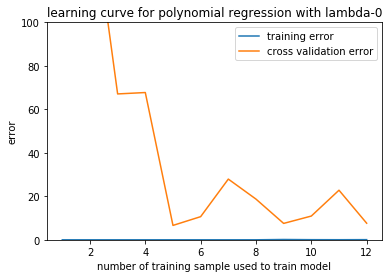

In [13]:
# 3.1 Learning Polynomial Regression

X_poly=make_polynomial_variables(X, 8)
Xval_poly=make_polynomial_variables(Xval, 8)

## important: NORMALIZE FEATURE FOR 8TH POWER GENERATES ASTROMICAL INPUT VALUES
def normalize_feature(X_input, avg=[-999], std=[-999]): # avg and std = -999 means calculating mean and std from input. Otherwise use given avg and std (for prediction)
    if len(avg)==1 and len(std)==1 and avg[0] == -999 and std[0] == -999:
        avg = np.mean(X_input, axis=0)
        std = np.std(X_input, axis=0)
    X_normalized = (X_input - avg)/std
    
    return X_normalized, avg, std

# normalize X inputs
X_poly, X_poly_avg, X_poly_std = normalize_feature(X_poly)
Xval_poly, _, _ = normalize_feature(Xval_poly, X_poly_avg, X_poly_std) # NOTE: use training sample mean and std for normalization

# plot learning curve
plot_learning_curve(X_poly, y, Xval_poly, yval, 'learning curve for polynomial regression with lambda-0', lmbd=0, ylim=100)

         Current function value: 0.073041
         Iterations: 200
         Function evaluations: 374
         Gradient evaluations: 374
[ 11.21720156  10.66138532  16.97745411  13.65220572 -24.88834682
 -27.39623923  20.76261809  17.92944134  -3.98782661]


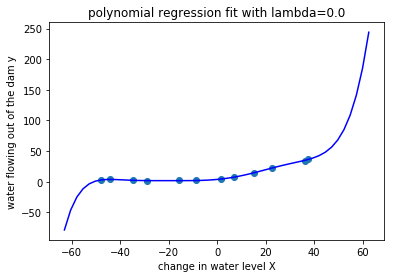

In [14]:
def plot_polynomial_fit(X, Xval, y, lmbd, plot_title):
    X_poly=make_polynomial_variables(X, 8)
    Xval_poly=make_polynomial_variables(Xval, 8)
    X_poly, X_poly_avg, X_poly_std = normalize_feature(X_poly)
    Xval_poly, _, _ = normalize_feature(Xval_poly, X_poly_avg, X_poly_std) # NOTE: use training sample mean and std for normalization

    res = fit_OLS(cost, grad, X_poly, y, lmbd)
    print(res)

    xs=np.linspace(min(X)-15, max(X)+25)
    # xs=np.linspace(min(X)-15, max(X)+25)
    y_hat = predict(normalize_feature(make_polynomial_variables(xs, 8), X_poly_avg, X_poly_std)[0], res)

    plt.scatter(X, y)
    plt.plot(xs, y_hat, '-b')
    plt.xlabel('change in water level X')
    plt.ylabel('water flowing out of the dam y')
    plt.title(plot_title)
    
lmbd=0.
plot_polynomial_fit(X, Xval, y, lmbd, plot_title='polynomial regression fit with lambda='+str(lmbd))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 22
         Function evaluations: 37
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 17
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 31
         Function evaluations: 52
   

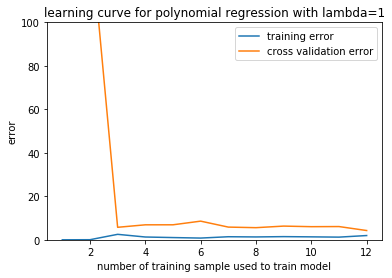

In [18]:
# 3.2  Optional (ungraded) exercise: Adjusting the regularization parameter

# plot learning curve
## lambda = 1
plot_learning_curve(X_poly, y, Xval_poly, yval, 'learning curve for polynomial regression with lambda=1', lmbd=1, ylim=100)

Optimization terminated successfully.
         Current function value: 6.830463
         Iterations: 34
         Function evaluations: 62
         Gradient evaluations: 62
[11.21759102  8.3672601   5.10195864  3.39010322  2.15887494  1.62044371
  0.97249263  1.02577129  0.32263363]


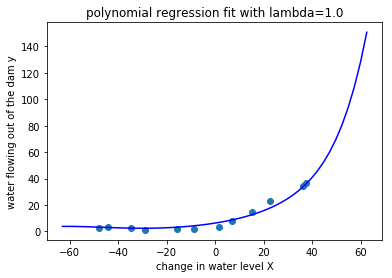

In [16]:
# lambda = 1

lmbd=1.
plot_polynomial_fit(X, Xval, y, lmbd, plot_title='polynomial regression fit with lambda='+str(lmbd))

Optimization terminated successfully.
         Current function value: 65.950955
         Iterations: 9
         Function evaluations: 17
         Gradient evaluations: 17
[11.21758933  0.99128451  0.3410157   0.76526037  0.1568759   0.56654377
  0.02895654  0.42467798 -0.05196792]


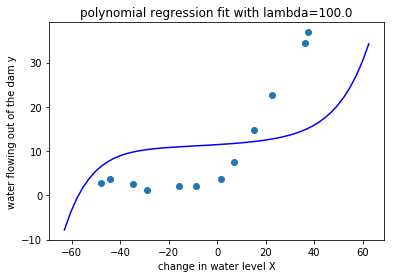

In [17]:
# lambda = 100

lmbd=100.
plot_polynomial_fit(X, Xval, y, lmbd, plot_title='polynomial regression fit with lambda='+str(lmbd))

0.0
         Current function value: 0.073041
         Iterations: 200
         Function evaluations: 374
         Gradient evaluations: 374
0.001
         Current function value: 0.169483
         Iterations: 200
         Function evaluations: 387
         Gradient evaluations: 387
0.003
         Current function value: 0.243174
         Iterations: 200
         Function evaluations: 393
         Gradient evaluations: 393
0.01
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 143
         Function evaluations: 284
         Gradient evaluations: 284
0.03
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 114
         Function evaluations: 201
         Gradient evaluations: 201
0.1
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 89
         Function evaluations: 168
         Gradient evaluations: 168
0.3
Optimization terminated success

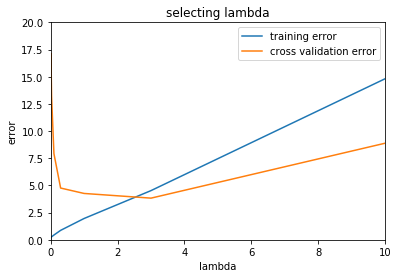

In [24]:
# 3.3 Selecting lambda using a cross validation test
lmbds=[0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]

# 2 Bias - variance
# 2.1 Learning curves

def validate_curve(X, y, Xval, yval, lmbds, plot_title, ylim=150):
    n_train=X.shape[0]
    n_cv=Xval.shape[0]
    # n_test=Xtest.shape[0]

    er_train, er_val = [], []

    # loop through number of samples
    for lmbd in lmbds:
        print(lmbd)
        theta_train = fit_OLS(cost, grad, X, y, lmbd); # not-regularized
        er_train.append(cost(X, y, theta_train, 0)) # training error does not include regularization by definition
        er_val.append(cost(Xval, yval, theta_train, 0)) 

    # plot learning curves for both training error and cross validation error
    plt.plot(lmbds, er_train, label='training error')
    plt.plot(lmbds, er_val, label='cross validation error')
    plt.legend()
    plt.xlabel('lambda')
    plt.ylabel('error')
    plt.title(plot_title)
    plt.ylim((0, ylim))
    plt.xlim((0, lmbds[-1]))

    
# plot lambda validate curve
X_poly=make_polynomial_variables(X, 8)
Xval_poly=make_polynomial_variables(Xval, 8)
X_poly, X_poly_avg, X_poly_std = normalize_feature(X_poly)
Xval_poly, _, _ = normalize_feature(Xval_poly, X_poly_avg, X_poly_std) # NOTE: use training sample mean and std for normalization

validate_curve(X_poly, y, Xval_poly, yval, lmbds, 'selecting lambda', 20)

In [29]:
# 3.4 Optional (ungraded) exercise: Computing test set error
Xtest_poly=make_polynomial_variables(Xtest, 8)
Xtest_poly, _, _ = normalize_feature(Xtest_poly, X_poly_avg, X_poly_std) # NOTE: use training sample mean and std for normalization

lmbd=3. # this lambda gives lowest cross validate error
theta_train = fit_OLS(cost, grad, X_poly, y, lmbd); # not-regularized

print('training error for lambda = 3:', cost(X_poly, y, theta_train, lmbd)) # training error does not include regularization by definition
print('cross validation error for lambda = 3:', cost(Xval_poly, yval, theta_train, 0))
print('test error for lambda = 3:', cost(Xtest_poly, ytest, theta_train, 0))


Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24
training error for lambda = 3: 14.937645805918176
cross validation error for lambda = 3: 3.8321763825008475
test error for lambda = 3: 3.57202661957797
